In [8]:
import sympy as sp

x = sp.symbols('x')

q = sp.exp(-x**2)
Z = sp.integrate(q, (x,-sp.oo,sp.oo))
q = q / Z
muhat = sp.integrate(x*q, (x,-sp.oo,sp.oo))
sigmasqhat = sp.integrate(x*x*q, (x,-sp.oo,sp.oo)) - muhat**2
print(muhat)
print(sigmasqhat)

0
1/2


1.0666049289317596

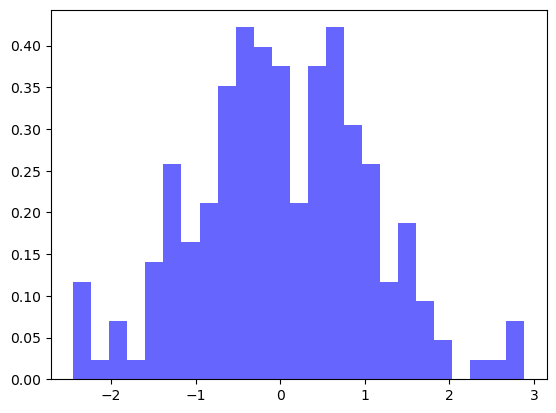

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("/home/pl61/density-regression/deep-symbolic-optimization/dso/data/N(0,1)200.csv", header = None)
d = np.asarray(dataset.iloc[:,0])
plt.hist(d, bins=25, density=True, alpha=0.6, color='b')

np.var(d)


In [12]:
new_string = ""
def sympy_convert(s):
    new_string = s.replace("log", "sp.log")
    new_string = new_string.replace("x1", "x")
    new_string = new_string.replace("exp", "sp.exp")
    return new_string

# def numpy_convert(s):
#     new_string = s.replace("log", "np.log")
#     new_string = new_string.replace("x1", "arr[i]")
#     new_string = new_string.replace("exp", "np.exp")
#     return new_string

s = "exp(x1**2*(x1 - 24.75602193203185)/(x1 + 50.418291333340534))"
print(sympy_convert(s))
# print(numpy_convert(s))

sp.exp(x**2*(x - 24.75602193203185)/(x + 50.418291333340534))


exp(x**2*(x - 24.7560219320318)/(x + 50.4182913333405))
exp(x**2*(x - 24.7560219320318)/(x + 50.4182913333405))


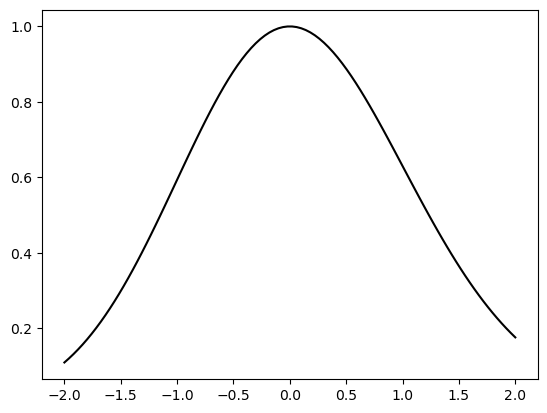

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = sp.symbols('x')
huh = sp.exp(x**2*(x - 24.75602193203185)/(x + 50.418291333340534))
print(huh)
print(huh.simplify())
h_func = sp.lambdify(x, huh, 'numpy')

x_vals = np.linspace(-2,2,100)
y_vals = h_func(x_vals)

plt.plot(x_vals, y_vals, color='black', linestyle='-')
plt.show()

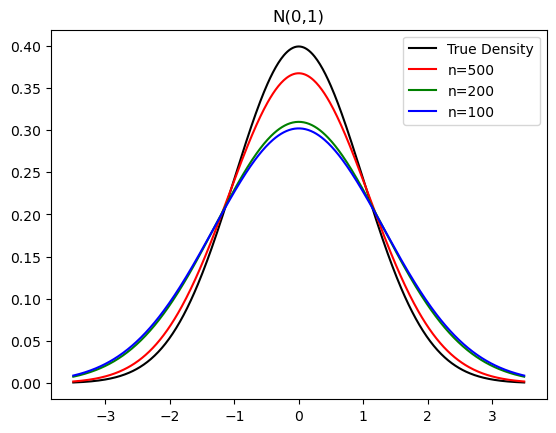

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv("/home/pl61/density-regression/deep-symbolic-optimization/dso/data/N(0,1)500.csv", header = None)
d = np.asarray(dataset.iloc[:,0])
# plt.hist(d, bins=25, density=True, alpha=0.6, color='b')

mu = 0.0
var = 1 #sigma^2
def func(x):
    return 1/(np.sqrt(2*np.pi*var))*np.exp(-x**2/(2*var))

x_vals = np.linspace(-3.5, 3.5, 500)
y_vals = func(x_vals)

var = 1/(2*0.4236)

x_valss = np.linspace(-3.5, 3.5, 500)
y_valss = func(x_valss)

var = 1/(2*0.3012)

x_valsss = np.linspace(-3.5, 3.5, 500)
y_valsss = func(x_valsss)

var = 1/(2*0.2863)

x_valssss = np.linspace(-3.5, 3.5, 500)
y_valssss = func(x_valssss)

plt.plot(x_vals, y_vals, color='black', linestyle='-')
plt.plot(x_valss, y_valss, color='red', linestyle='-')
plt.plot(x_valsss, y_valsss, color='green', linestyle='-')
plt.plot(x_valssss, y_valssss, color='blue', linestyle='-')
plt.legend(['True Density', 'n=500', 'n=200', 'n=100'])
plt.title("N(0,1)")
plt.show()


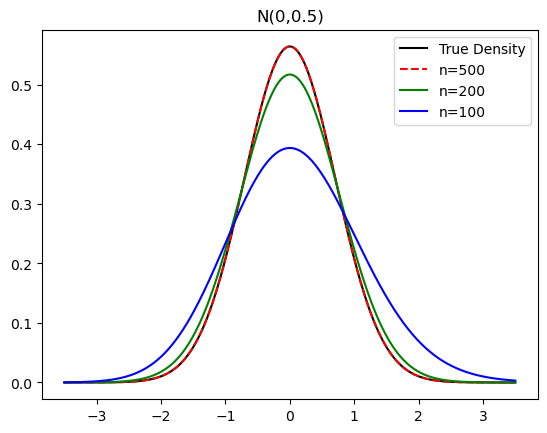

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sp

x = sp.symbols('x')
huh = sp.exp(x**2*(x - 24.75602193203185)/(x + 50.418291333340534))/2.54
h_func = sp.lambdify(x, huh, 'numpy')

dataset = pd.read_csv("/home/pl61/density-regression/deep-symbolic-optimization/dso/data/N(0,1)500.csv", header = None)
d = np.asarray(dataset.iloc[:,0])
# plt.hist(d, bins=25, density=True, alpha=0.6, color='b')

mu = 0.0
var = 0.5
def func(x):
    return 1/(np.sqrt(2*np.pi*var))*np.exp(-x**2/(2*var))

x_vals = np.linspace(-3.5, 3.5, 500)
y_vals = func(x_vals)

x_valss = np.linspace(-3.5, 3.5, 500)
y_valss = h_func(x_valss)

var = 1/(2*0.8401)

x_valsss = np.linspace(-3.5, 3.5, 500)
y_valsss = func(x_valsss)

var = 0.5

x_valssss = np.linspace(-3.5, 3.5, 500)
y_valssss = func(x_valssss)

plt.plot(x_vals, y_vals, color='black', linestyle='-')
plt.plot(x_valssss, y_valssss, color='red', linestyle='--')
plt.plot(x_valsss, y_valsss, color='green', linestyle='-')
plt.plot(x_valss, y_valss, color='blue', linestyle='-')
plt.legend(['True Density', 'n=500', 'n=200', 'n=100'])
plt.title("N(0,0.5)")
plt.show()


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sp

import os
os.chdir('/home/pl61/density-regression/deep-symbolic-optimization/dso')

from dso.kernels import (
    GaussianKernel,
    PolynomialKernel,
    DSOSteinKernel
)
from dso.discrepancies import DSOKernelSteinDiscrepancy

dataset = pd.read_csv("/home/pl61/density-regression/deep-symbolic-optimization/dso/data/N(0,0.5)1000.csv", header = None)
data = np.asarray(dataset.iloc[:,0])

x = sp.symbols('x')

def rew_given_dens(formula, sigma):
    kernel = GaussianKernel(sigma=sigma) 
    kernel = PolynomialKernel(p = 2) #Quadratic kernel
    disc = DSOKernelSteinDiscrepancy(DSO_stein_kernel = DSOSteinKernel(
        kernel=kernel,
        distribution=formula
    ))
    y = data.reshape(-1, 1)
    return 0 if disc.compute(y) <= -2 else 1/(1 +np.abs(disc.compute(y)))

grid = np.linspace(0.01, 1.0, 99) #grid[i] = sigma^2
rr = np.zeros_like(grid)
for i in range(len(grid)):
    if i % 10 == 0:
        print(i)
    rr[i] = rew_given_dens(sp.exp(-x**2 / (2 * grid[i])), 0.09)

0
10
20
30
40
50
60
70
80
90


In [1]:
plt.plot(grid, rr, color='r', linestyle='-')
plt.show()

NameError: name 'plt' is not defined

In [3]:
print(np.max(rr))
print(grid[np.argmax(rr)])
print(np.var(data))

0.9997778569506804
0.5555102040816327
0.4936232661566186


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor
from functools import partial

from dso.distributions import Gaussian
from dso.kernels import (
    GaussianKernel,
    SteinKernel,
)
from dso.discrepancies import KernelSteinDiscrepancy

In [5]:
np.random.seed(0)
plt.rc("legend", fontsize=7)

In [6]:
q_sigmas = np.arange(0.1, 2, 0.001)
ksd_vals = []
Y = np.random.multivariate_normal(mean=np.array([0]), cov=np.array([[0.5]]), size=1000)
rbf_kernel = GaussianKernel(sigma=0.1)


def compute_ksd_for_sigma(sigma, Y, rbf_kernel):
    gaussian = Gaussian(mu=np.zeros((1, 1)), covariance=np.array([[sigma]]))
    stein_kernel = SteinKernel(kernel=rbf_kernel, distribution=gaussian)
    ksd = KernelSteinDiscrepancy(stein_kernel=stein_kernel)
    return ksd.compute(Y)

In [ ]:
with ProcessPoolExecutor(max_workers=10) as executor:
    ksd_vals = list(
        tqdm(
            executor.map(
                partial(compute_ksd_for_sigma, Y=Y, rbf_kernel=rbf_kernel), q_sigmas
            ),
            total=len(q_sigmas),
        )
    )

In [ ]:
# sigma that minimizes KSD
min_sigma = q_sigmas[np.argmin(ksd_vals)]

plt.figure(figsize=(8, 6))
plt.plot(q_sigmas, ksd_vals, linestyle="-")
plt.xlabel("sigma")
plt.ylabel("KSD")

plt.axvline(
    x=min_sigma, color="black", linestyle="--", label=f"argmin sigma = {min_sigma}"
)
plt.axvline(x=0.5, color="red", linestyle="-", label="True sigma = 0.5")
plt.legend()
plt.show()